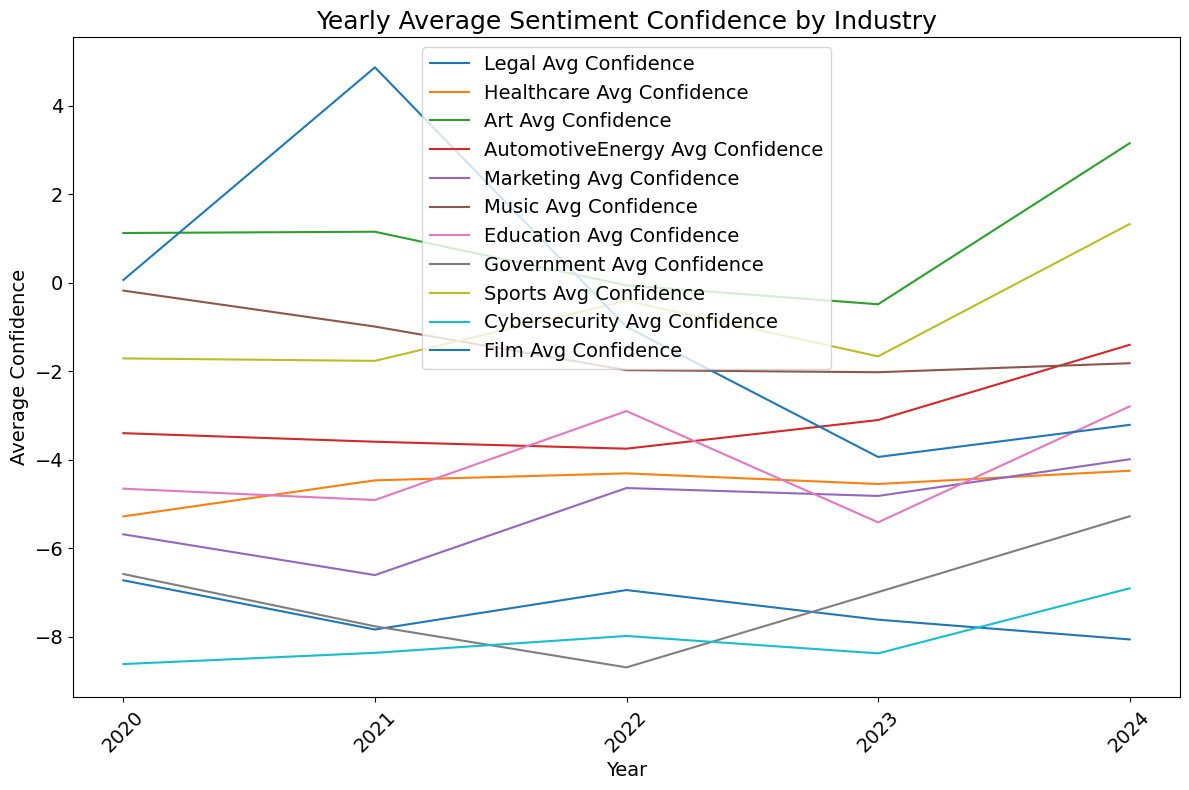

CPU times: user 2min 6s, sys: 3.5 s, total: 2min 10s
Wall time: 2min 13s


In [1]:
%%time
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker

# Load the dataset and the sentiment model
news_topics = pd.read_parquet('./data/filtered_news_with_topics.parquet')
sentiment_model = joblib.load('./models/best_sentiment_model.joblib')

# Modify this line to create a 'year' column instead of 'month_year'
news_topics['date'] = pd.to_datetime(news_topics['date'])

# Create a 'year' column for aggregation by year
news_topics['year'] = news_topics['date'].dt.year

vectorizer = sentiment_model.named_steps['countvectorizer']
model = sentiment_model.named_steps['sgdclassifier']

def get_article_score(article, model, vectorizer):
    # Vectorize the article
    transformed_article = vectorizer.transform([article])
    # Predict sentiment score using the decision function
    score = model.decision_function(transformed_article)
    return score[0]

# Aggregate by year for each topic name
results = {}

for topic_name in news_topics['topic_name'].unique():
    topic_df = news_topics[news_topics['topic_name'] == topic_name]
    yearly_scores = topic_df.groupby('year')['text'].apply(lambda x: np.mean([get_article_score(article, model, vectorizer) for article in x])).reset_index(name='avg_confidence')

    results[topic_name] = yearly_scores

# # Visualization
# plt.figure(figsize=(12, 8))

# for industry, data in results.items():
#     # Plotting average sentiment score
#     plt.plot(data['year'], data['avg_confidence'], label=industry + " Avg Confidence")
    
#     # Optional: Adding article counts as text annotations for each year (if article counts are needed, ensure to calculate and add them to your dataframe)

# plt.xlabel('Year')
# plt.ylabel('Average Confidence')
# plt.title('Yearly Average Sentiment Confidence by Industry')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

# Visualization
# plt.figure(figsize=(12, 8))

# for industry, data in results.items():
#     plt.plot(data['year'], data['avg_confidence'], label=industry + " Avg Confidence")

# plt.xlabel('Year')
# plt.ylabel('Average Confidence')
# plt.title('Yearly Average Sentiment Confidence by Industry')

# # Set x-axis to display integer years only
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 8))

for industry, data in results.items():
    plt.plot(data['year'], data['avg_confidence'], label=industry + " Avg Confidence")

# Increase font size for axis labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Confidence', fontsize=14)
plt.title('Yearly Average Sentiment Confidence by Industry', fontsize=18)

# Set x-axis to display integer years only
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Increase font size for tick labels
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Increase font size for legend
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

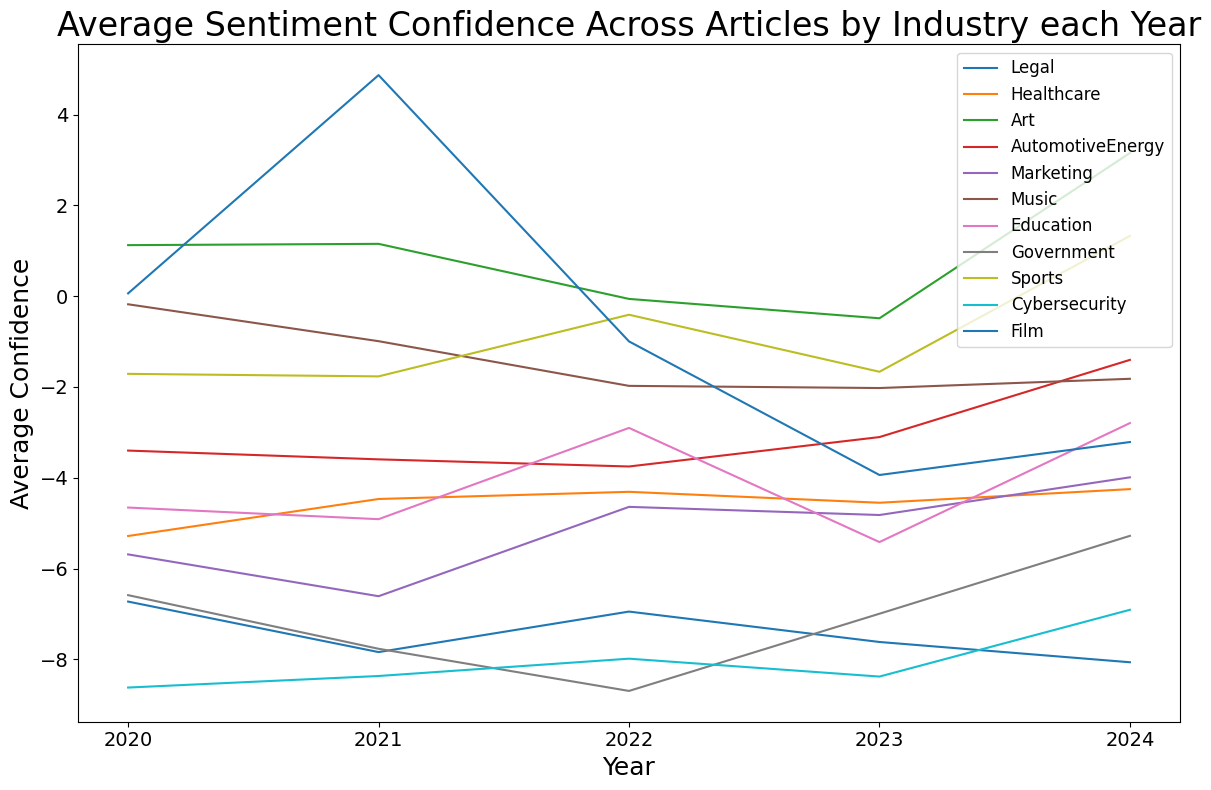

In [43]:
plt.figure(figsize=(12, 8))

for industry, data in results.items():
    plt.plot(data['year'], data['avg_confidence'], label=industry)

# Increase font size for axis labels and title
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average SVM Confidence', fontsize=18)
plt.title('Average SVM Sentiment Confidence Across Articles by Industry each Year', fontsize=24)

# Set x-axis to display integer years only
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Increase font size for tick labels
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Increase font size for legend
plt.legend(fontsize=12)

plt.tight_layout()

# Save the figure
plt.savefig('./plots/yearly_average_sentiment_confidence_by_industry.png')

plt.show()

In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Ensure 'date' column is datetime type and extract year
# news_topics['date'] = pd.to_datetime(news_topics['date'])
# news_topics['year'] = news_topics['date'].dt.year

# # Filter for the Healthcare topic
# healthcare_articles = news_topics[news_topics['topic_name'].str.lower() == 'healthcare'].copy()

# # Initialize counters to check for both singular and plural forms of various healthcare roles
# keywords = ['doctor', 'nurse', 'radiologist', 'surgeon', 'pharmacist', 'psychologist', 'therapist']
# for keyword in keywords:
#     healthcare_articles[keyword] = healthcare_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')

# # Aggregate counts by year
# aggregated_data = healthcare_articles.groupby('year').agg({keyword: 'sum' for keyword in keywords}).reset_index()

# # Convert boolean sums to integers
# aggregated_data[keywords] = aggregated_data[keywords].astype(int)

# # Remove rows for the year 2024 to avoid incomplete data
# aggregated_data_filtered = aggregated_data[aggregated_data['year'] != 2024]

# # Plotting the line chart with the filtered data
# plt.figure(figsize=(14, 8))

for keyword in keywords:
    plt.plot(aggregated_data_filtered['year'], aggregated_data_filtered[keyword], label=keyword.capitalize(), marker='o')

# Adding titles and labels
plt.title('Counts of Healthcare-Related Job Mentions by Year (Excluding 2024)', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(aggregated_data_filtered['year'].unique())  # Ensure we have all years as ticks, excluding 2024
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


NameError: name 'keywords' is not defined

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_keyword_trends(news_topics, topic_name, keywords, job_or_technology):
    """
    Plots a line chart of the proportions of articles mentioning specified keywords by year, excluding 2024.
    
    Parameters:
    - news_topics: DataFrame containing news topics and dates.
    - topic_name: The topic to filter by (e.g., 'Healthcare').
    - keywords: List of keywords to track (e.g., ['doctor', 'nurse']).
    - job_or_technology: Indicate whether keywords are related to jobs or technology.
    """
    # Ensure 'date' column is datetime type and extract year
    news_topics['date'] = pd.to_datetime(news_topics['date'])
    news_topics['year'] = news_topics['date'].dt.year

    # Filter for the specified topic and exclude 2024
    filtered_articles = news_topics[(news_topics['topic_name'].str.lower() == topic_name.lower()) & (news_topics['year'] != 2024)].copy()

    # Initialize counters for keywords (including plural forms)
    for keyword in keywords:
        # filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
        filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(?:s)?\b')

    # Calculate the total number of articles per year
    total_articles_per_year = filtered_articles.groupby('year').size()

    # Aggregate counts by year for each keyword
    aggregated_data = filtered_articles.groupby('year').agg({keyword: 'mean' for keyword in keywords}).reset_index()

    # Convert proportions to percentages
    # Note: This step is optional and can be adjusted based on preference
    aggregated_data[keywords] = aggregated_data[keywords] * 100

    # Plotting the line chart
    plt.figure(figsize=(12, 8))
    for keyword in keywords:
        plt.plot(aggregated_data['year'], aggregated_data[keyword], label=keyword.capitalize(), marker='o')

    # Adding titles and labels
    plt.title(f'Proportions of {topic_name.capitalize()}-Related {job_or_technology} Mentions by Year (Excluding 2024)', fontsize=24)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Proportion of Articles (%)', fontsize=18)
    plt.xticks(aggregated_data['year'].unique(), fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=18)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


# import pandas as pd
# import matplotlib.pyplot as plt

# def plot_keyword_trends(news_topics, topic_name, keywords, job_or_technology):
#     """
#     Plots a line chart of the counts of articles mentioning specified keywords by year, excluding 2024.
    
#     Parameters:
#     - news_topics: DataFrame containing news topics and dates.
#     - topic_name: The topic to filter by (e.g., 'Healthcare').
#     - keywords: List of keywords to track (e.g., ['doctor', 'nurse']).
#     """
#     # Ensure 'date' column is datetime type and extract year
#     news_topics['date'] = pd.to_datetime(news_topics['date'])
#     news_topics['year'] = news_topics['date'].dt.year

#     # Filter for the specified topic and exclude 2024
#     filtered_articles = news_topics[(news_topics['topic_name'].str.lower() == topic_name.lower()) & (news_topics['year'] != 2024)].copy()

#     # Initialize counters for keywords (including plural forms)
#     for keyword in keywords:
#         filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')

#     # Aggregate counts by year
#     aggregated_data = filtered_articles.groupby('year').agg({keyword: 'sum' for keyword in keywords}).reset_index()

#     # Convert boolean sums to integers
#     aggregated_data[keywords] = aggregated_data[keywords].astype(int)

#     # Plotting the line chart
#     plt.figure(figsize=(12, 8))
#     for keyword in keywords:
#         plt.plot(aggregated_data['year'], aggregated_data[keyword], label=keyword.capitalize(), marker='o')

#     # Adding titles and labels
#     plt.title(f'Counts of {topic_name.capitalize()}-Related {job_or_technology} Mentions by Year (Excluding 2024)', fontsize=24)
#     plt.xlabel('Year', fontsize=18)
#     plt.ylabel('Article Count', fontsize=18)
#     plt.xticks(aggregated_data['year'].unique(), fontsize=18)
#     plt.legend(fontsize=18)
#     plt.tight_layout()
#     plt.show()




/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, us

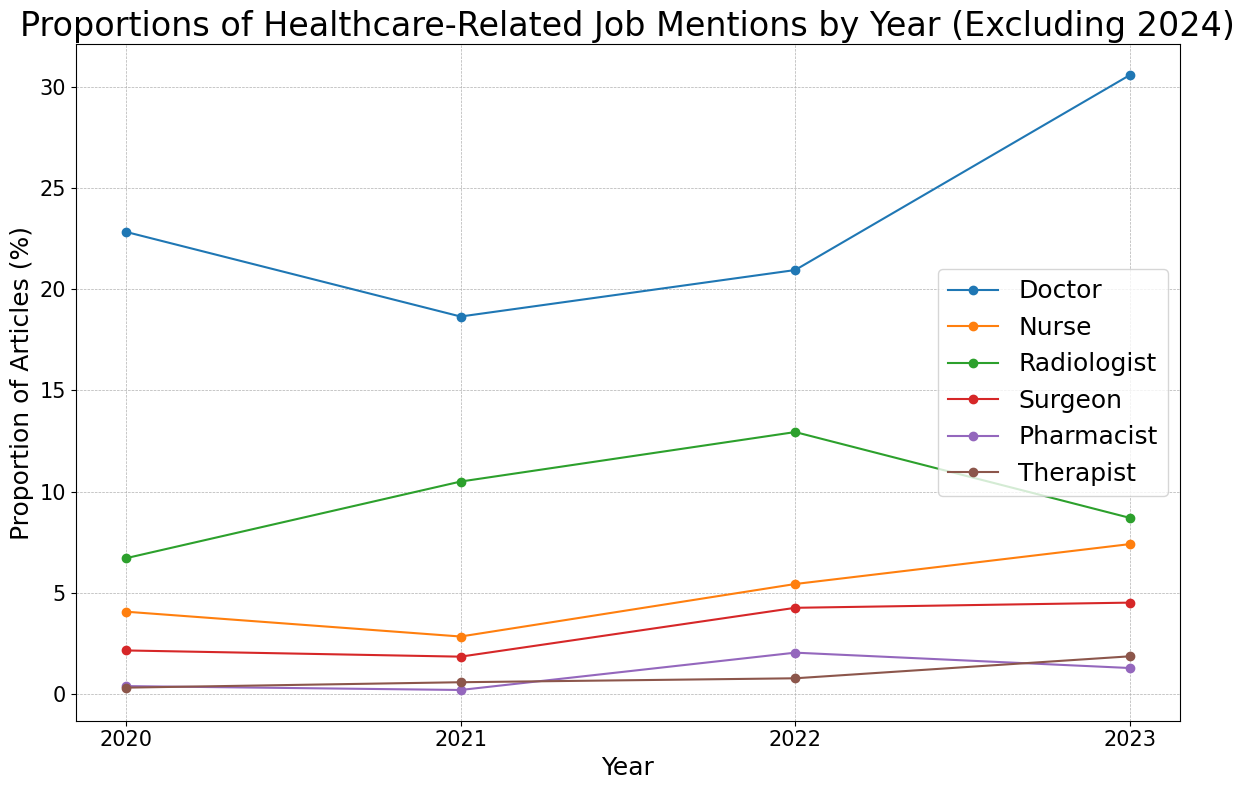

In [4]:
plot_keyword_trends(news_topics, 'Healthcare', ['doctor', 'nurse', 'radiologist', 'surgeon', 'pharmacist', 'therapist'], "Job")

/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_5758/1946097977.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, us

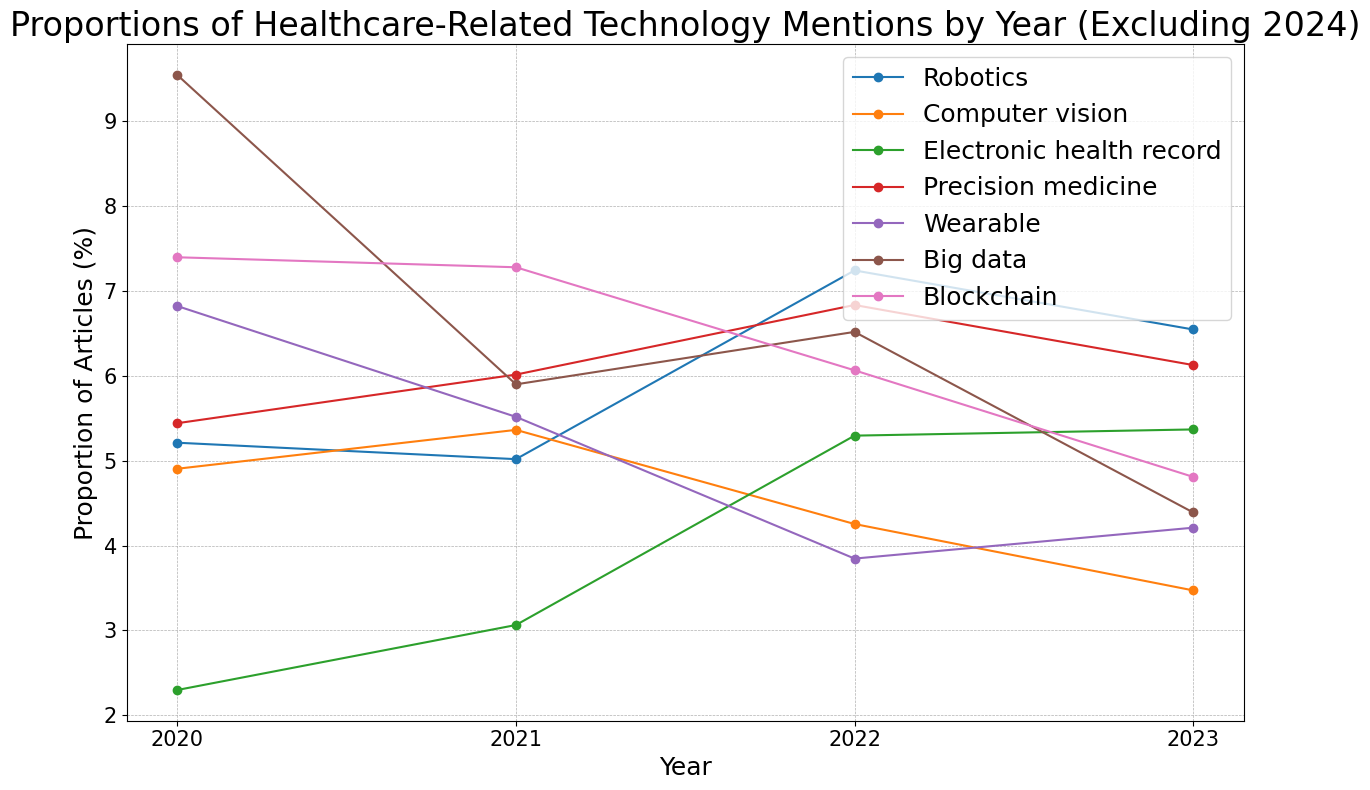

In [10]:
plot_keyword_trends(news_topics, 'Healthcare', ['robotics', 'computer vision', 'electronic health record', 'precision medicine', 'wearable', 'big data', 'blockchain'], "Technology")


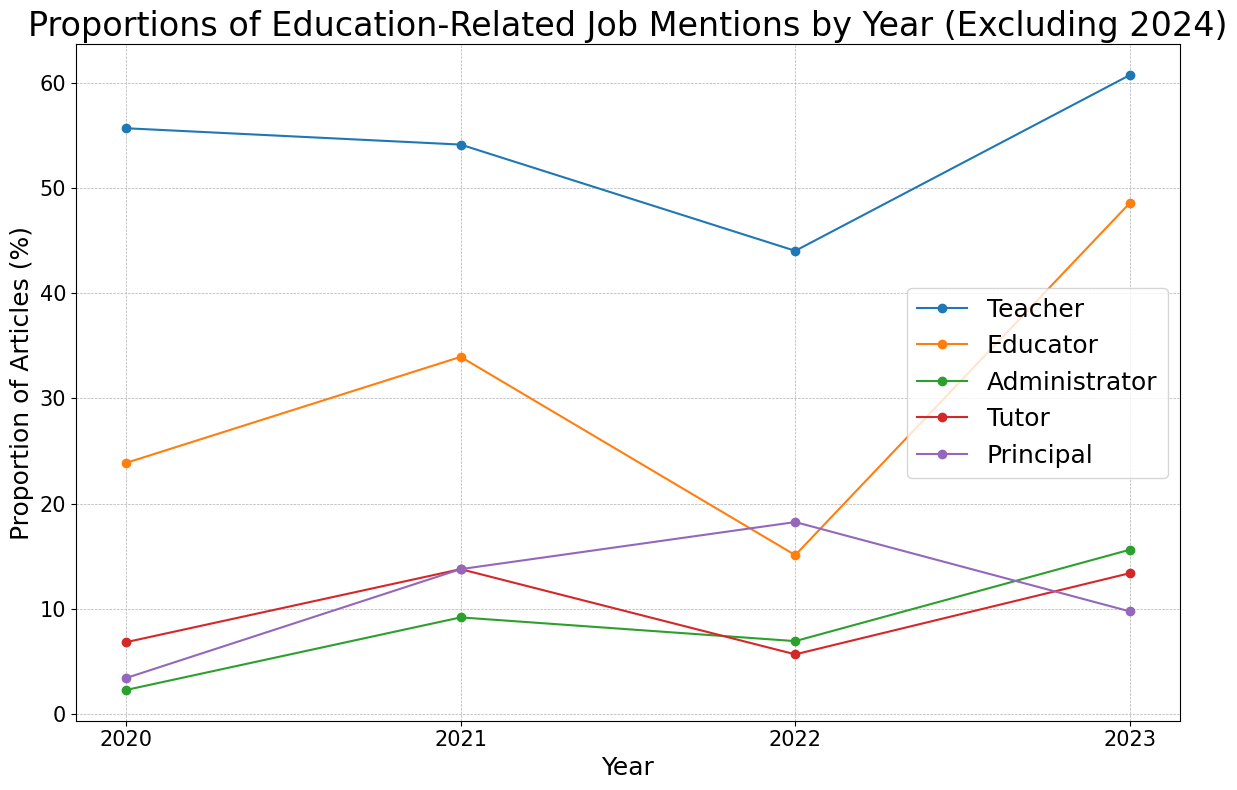

In [13]:
plot_keyword_trends(news_topics, 'Education', ['teacher', 'educator', 'administrator', 'tutor', 'principal'], "Job")



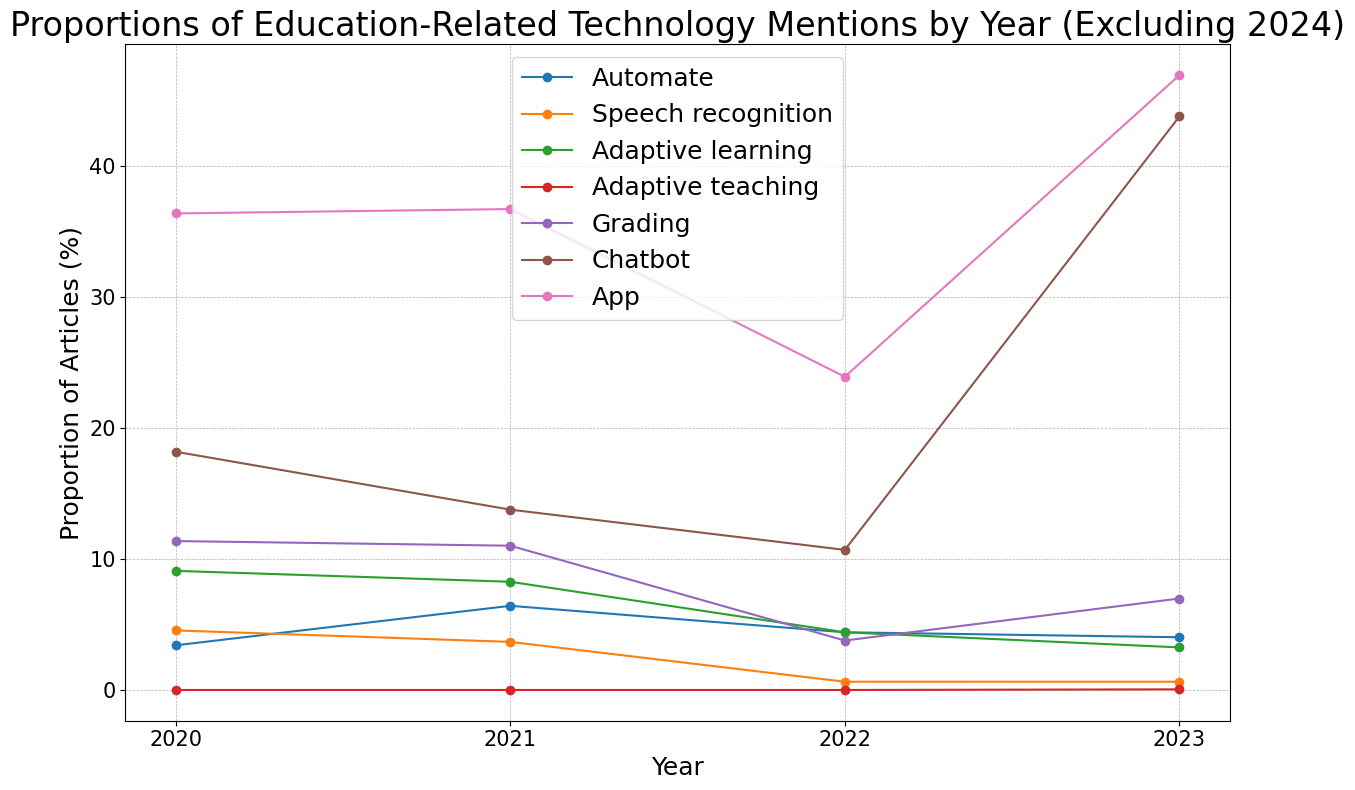

In [17]:
plot_keyword_trends(news_topics, 'Education', ['automate', 'speech recognition', 'adaptive learning', 'adaptive learning', 'grading', 'chatbot', 'app'], "Technology")





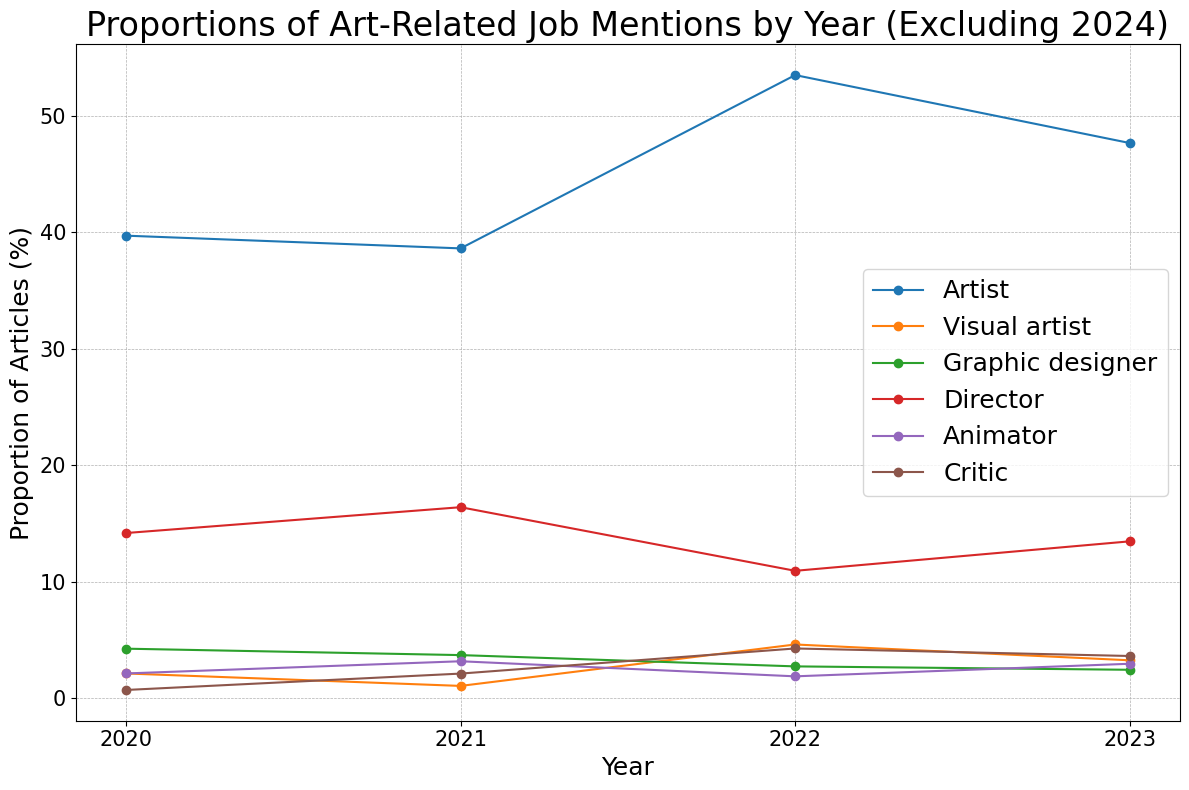

In [21]:
plot_keyword_trends(news_topics, 'Art', ['artist', 'visual artist', 'graphic designer', 'director', 'animator', 'critic'], "Job")




/var/tmp/ipykernel_4307/2647648028.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_4307/2647648028.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_4307/2647648028.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_articles[keyword] = filtered_articles['text'].str.lower().str.contains(fr'\b{keyword}(s)?\b')
/var/tmp/ipykernel_4307/2647648028.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, us

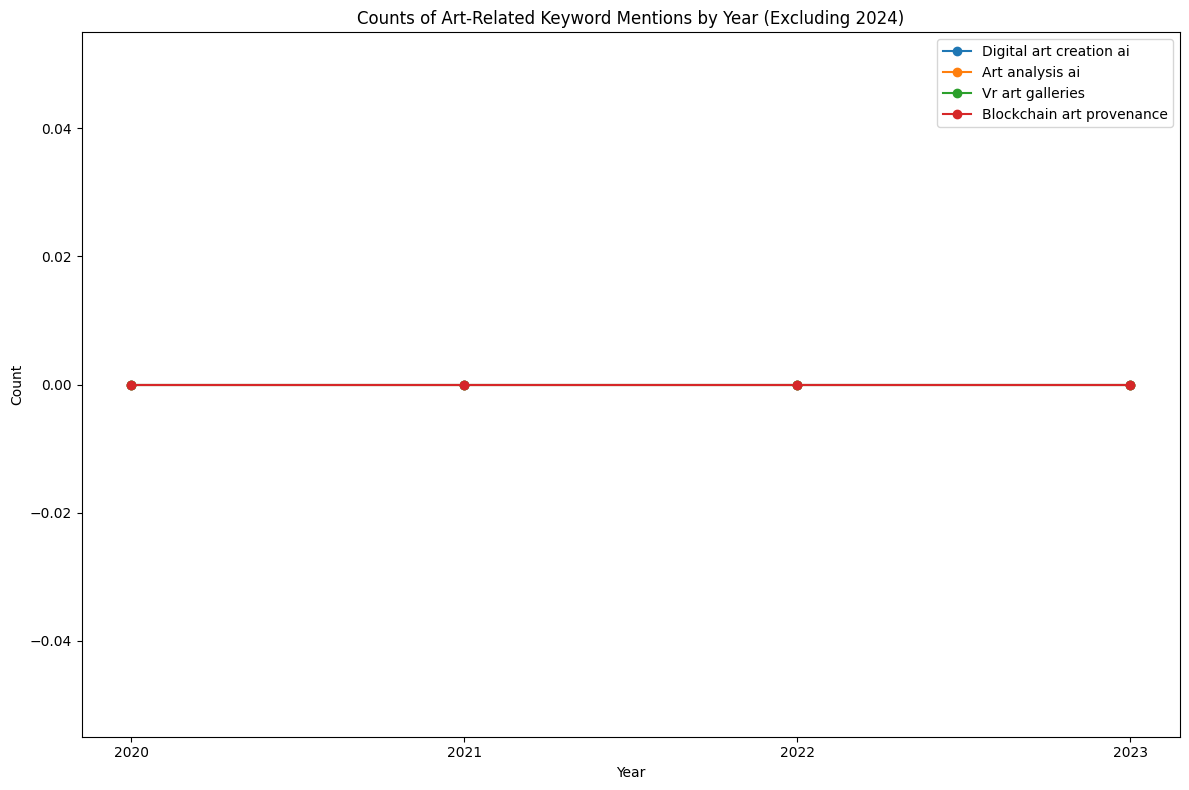

In [35]:
plot_keyword_trends(news_topics, 'Art', ['digital art creation AI', 'art analysis AI', 'VR art galleries', 'blockchain art provenance'])

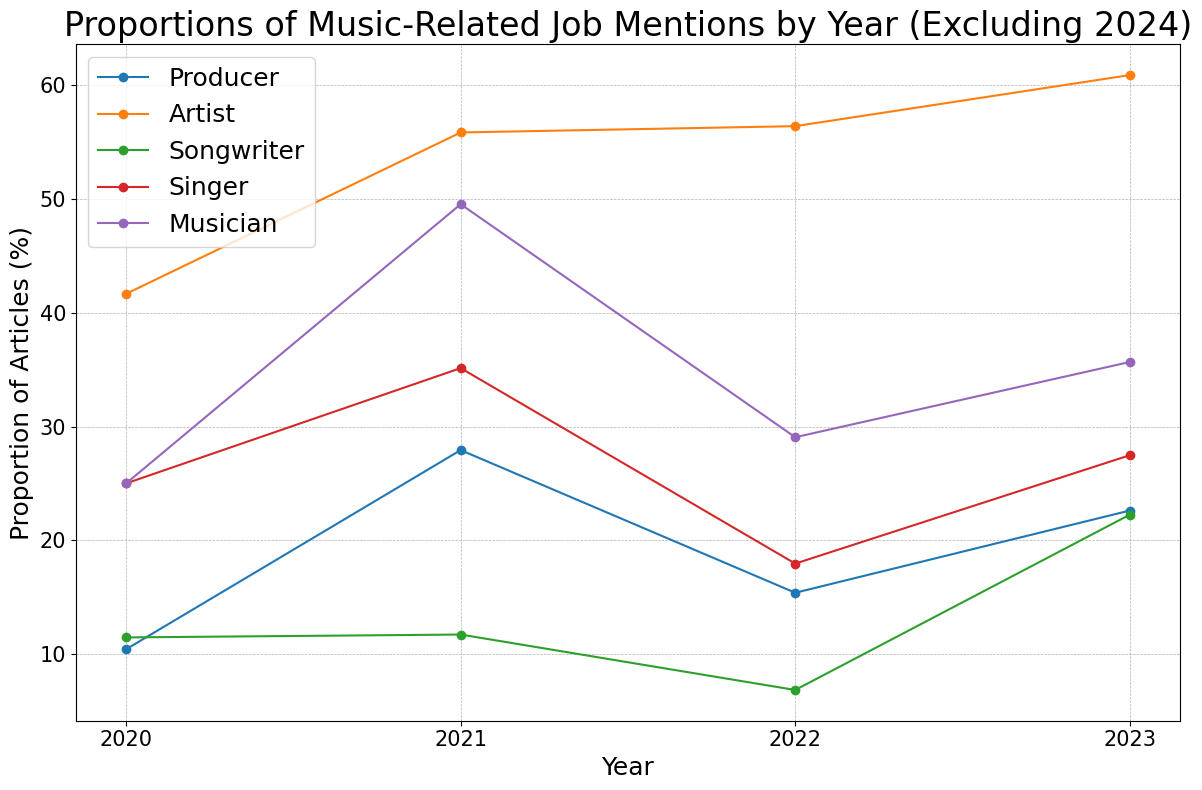

In [22]:
plot_keyword_trends(news_topics, 'Music', ['producer', 'artist', 'songwriter', 'singer', 'musician'], "Job")

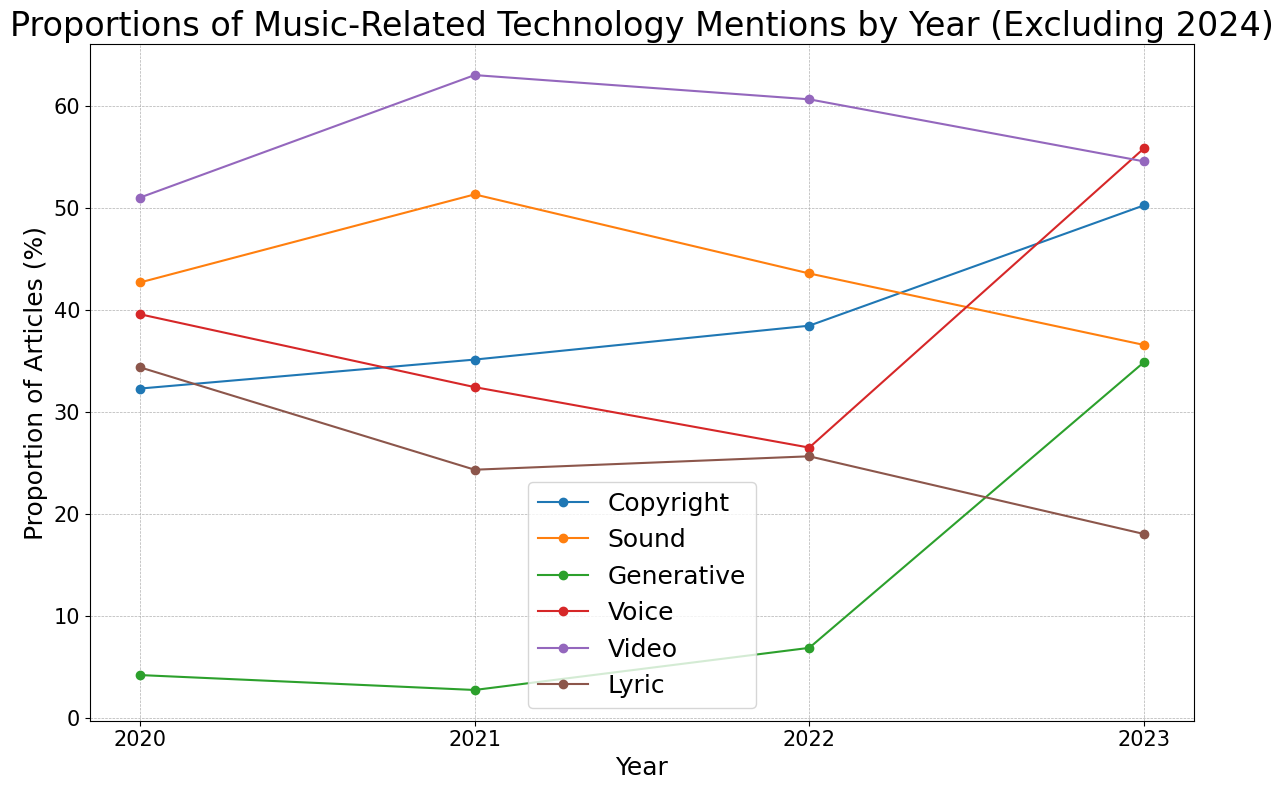

In [39]:
plot_keyword_trends(news_topics, 'Music', ['copyright', 'sound', 'generative', 'voice', 'video', 'lyric'], "Technology")

